In [141]:
import pandas as pd
import warnings
import numpy as np
# warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
import scikitplot as skplt
import plotly.express as px

### Read Data

In [2]:
data = pd.read_csv('health_data.csv')

In [4]:
data.head

<bound method NDFrame.head of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAlco

In [3]:
data.shape

(70692, 18)

#### Data vars visualization:

In [5]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

<AxesSubplot:>

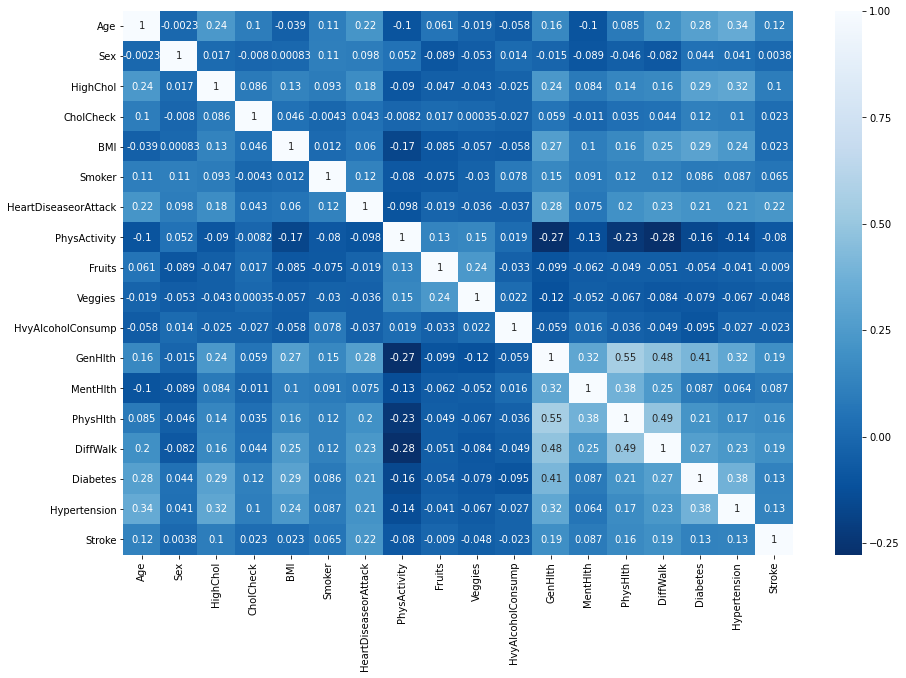

In [17]:
plt.figure(figsize=(15,10))
corr = data[data.columns].corr()
sns.heatmap(corr, annot=True,cmap='Blues_r',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [148]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [154]:
bin_var = ['Sex', 'HighChol', 'CholCheck',  'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke']
cont_var = ['Age','BMI','GenHlth', 'MentHlth', 'PhysHlth']

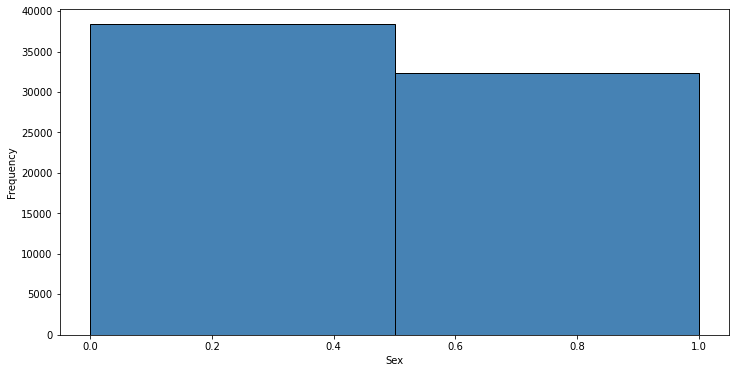

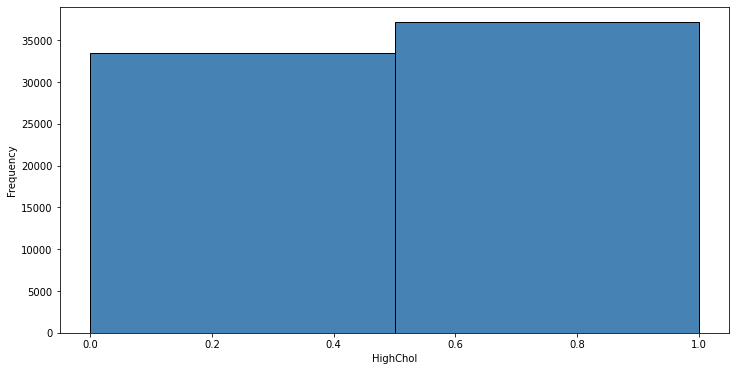

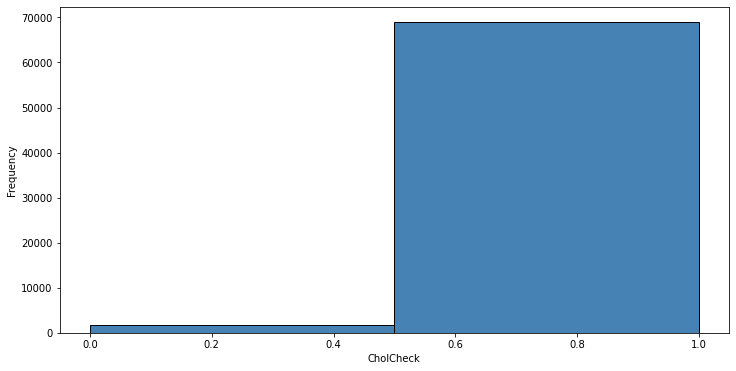

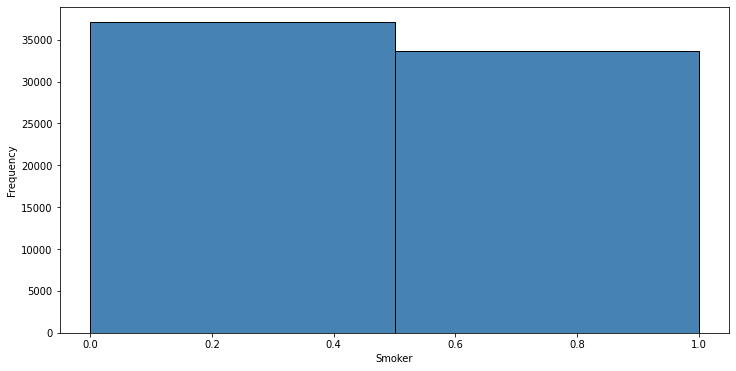

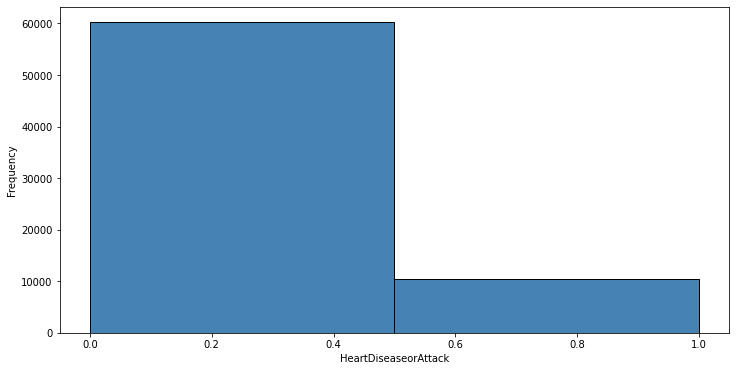

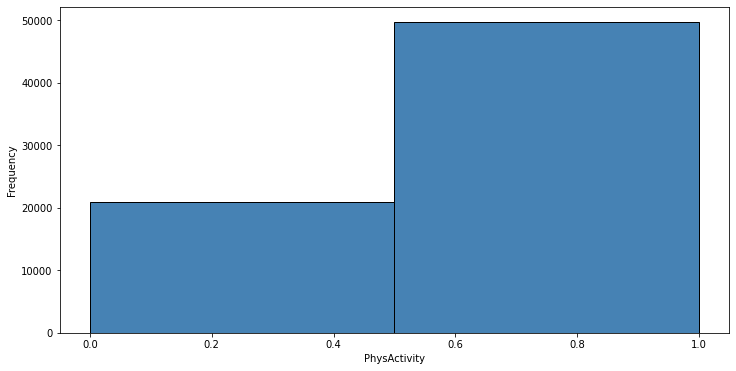

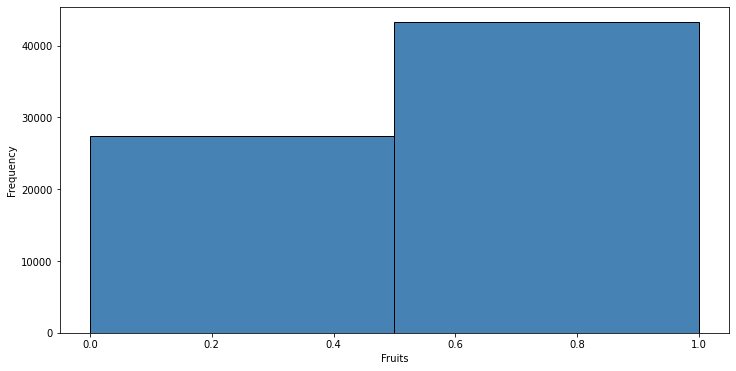

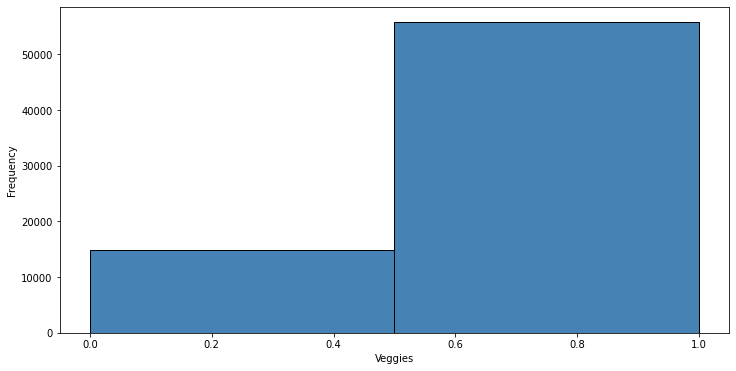

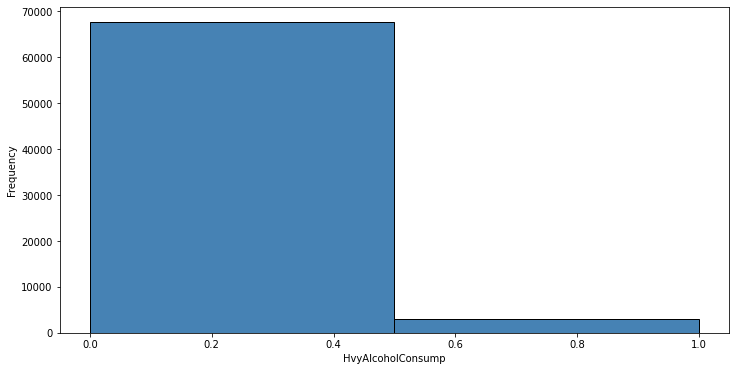

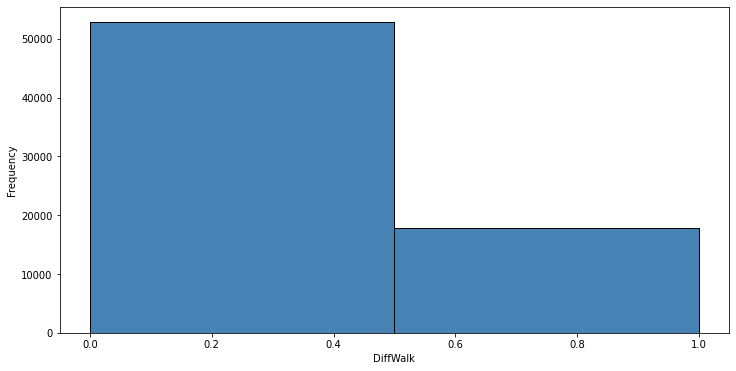

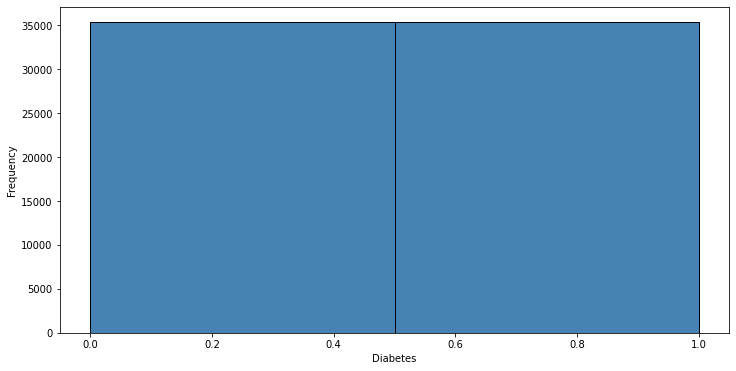

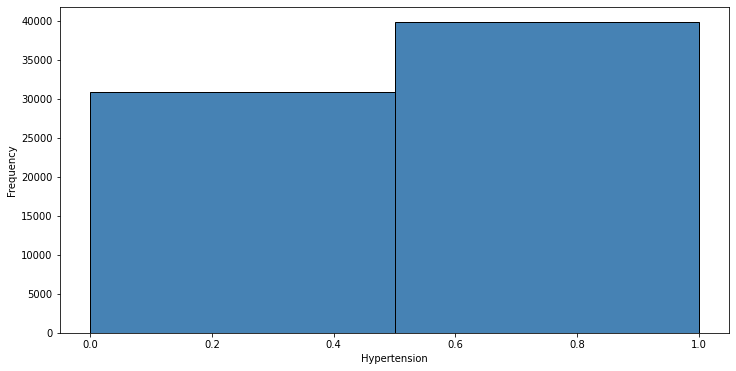

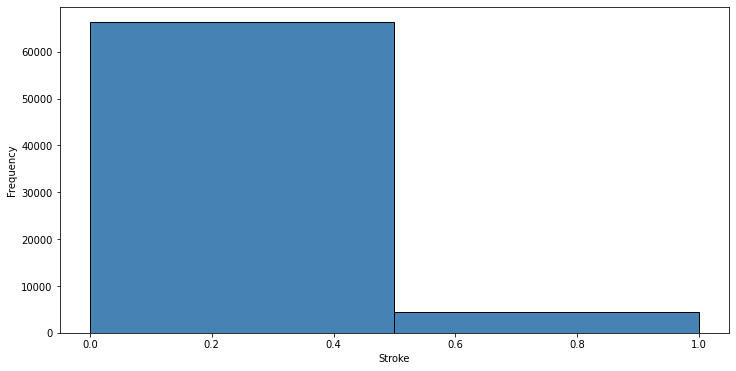

In [155]:
for i in bin_var:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=2, figsize=(12,6), facecolor='steelblue',edgecolor='black')
    plt.show()

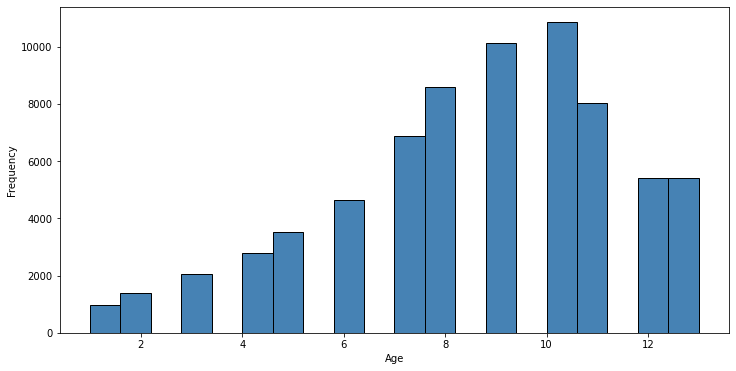

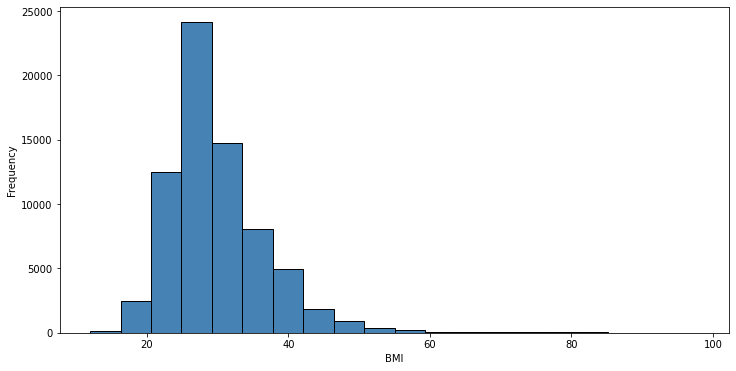

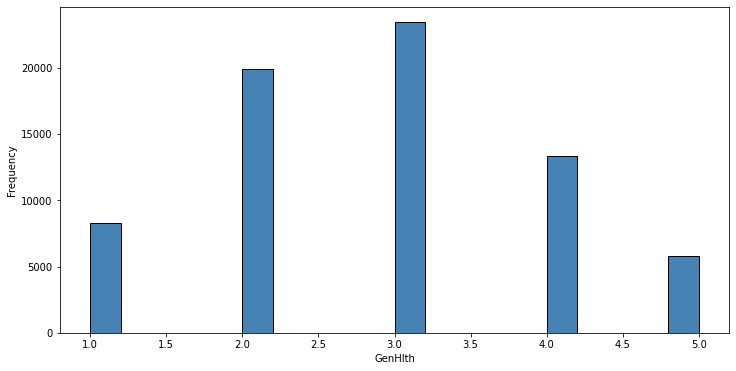

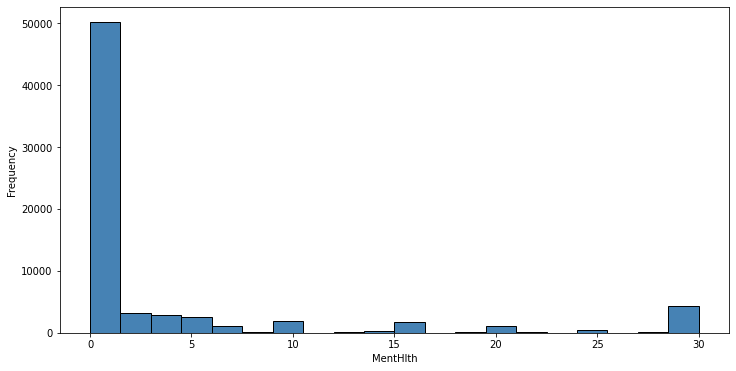

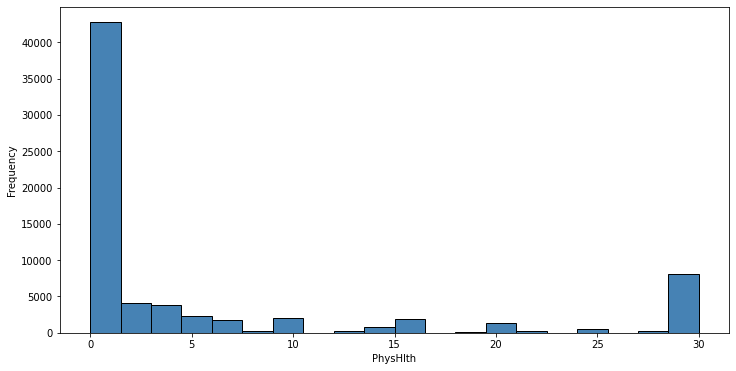

In [156]:
for i in cont_var:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=20, figsize=(12,6), facecolor='steelblue',edgecolor='black')
    plt.show()

#### Train Test Split


In [105]:
y_cols = ['Diabetes']
X = data.drop(y_cols,axis=1)
y = data[y_cols]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train.shape

(49484, 17)

In [61]:
X_train_scaled.shape

(49484, 17)

#### Outlier Detection

In [163]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_scaled)

In [170]:
for i in range(len(yhat)):
  if yhat[i]==-1 :
    print(i)

2
8
23
52
65
77
89
98
99
152
201
231
251
272
314
319
333
362
404
424
435
451
456
479
489
546
554
568
573
583
618
660
692
701
706
710
719
734
755
770
793
813
871
900
903
905
951
964
968
1008
1018
1054
1080
1104
1140
1167
1181
1264
1265
1266
1273
1275
1298
1312
1321
1347
1373
1397
1400
1454
1463
1490
1504
1507
1524
1537
1581
1660
1683
1689
1701
1715
1727
1736
1741
1825
1843
1853
1897
1914
1965
1967
2022
2028
2080
2118
2143
2192
2208
2221
2263
2264
2267
2285
2290
2297
2357
2377
2449
2468
2470
2491
2503
2523
2525
2534
2580
2584
2630
2631
2691
2740
2749
2762
2778
2791
2814
2837
2845
2876
2884
2888
2922
2929
2942
2946
2947
2949
2992
3021
3066
3114
3115
3144
3149
3170
3172
3173
3201
3206
3226
3244
3297
3309
3350
3369
3386
3399
3424
3446
3487
3507
3512
3529
3540
3545
3559
3591
3594
3668
3678
3680
3682
3720
3753
3763
3764
3779
3818
3843
3909
3912
3913
3933
3959
4016
4026
4039
4086
4110
4149
4159
4188
4232
4279
4281
4291
4293
4294
4337
4339
4374
4375
4376
4388
4390
4411
4427
4440
4476
4513
4516


### logistic reg


In [107]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_scaled, y_train.values.ravel())
y_pred = logreg.predict(X_test_scaled)

In [108]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7628, 2976],
       [2512, 8092]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

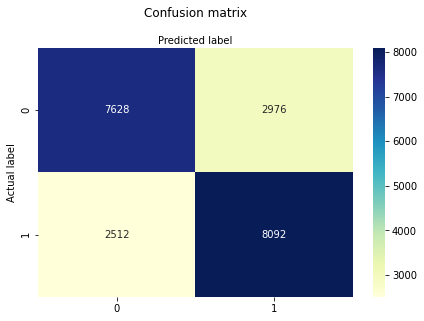

In [74]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [76]:
from sklearn.metrics import classification_report
target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.75      0.72      0.74     10604
    diabetes       0.73      0.76      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [177]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7412297246322143


c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


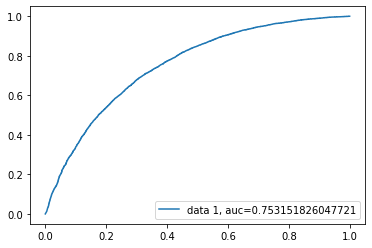

In [137]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest(MRF)

In [79]:
#model
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [80]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[7244, 3360],
       [2489, 8115]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

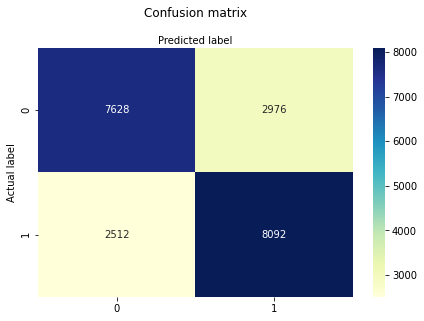

In [81]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [82]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train.values().ravel())

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [83]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

BMI                     0.212188
Age                     0.151128
GenHlth                 0.126142
PhysHlth                0.086491
Hypertension            0.082796
MentHlth                0.067379
HighChol                0.042631
Smoker                  0.033629
Fruits                  0.033306
Sex                     0.031084
DiffWalk                0.027769
PhysActivity            0.027589
Veggies                 0.026835
HeartDiseaseorAttack    0.020298
Stroke                  0.012469
HvyAlcoholConsump       0.011481
CholCheck               0.006786
dtype: float64

In [84]:
target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.74      0.68      0.71     10604
    diabetes       0.71      0.77      0.74     10604

    accuracy                           0.72     21208
   macro avg       0.73      0.72      0.72     21208
weighted avg       0.73      0.72      0.72     21208



### knn classification


In [109]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_scaled,y_train.values.ravel())
y_pred3 = knn1.predict(X_test_scaled)
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[7121, 3483],
       [2998, 7606]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

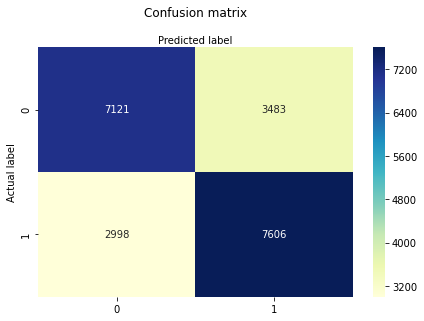

In [122]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.694407770652584


In [116]:
#k=5
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled,y_train.values.ravel())
y_pred4 = knn2.predict(X_test_scaled)
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix4


array([[7202, 3402],
       [2692, 7912]], dtype=int64)

In [117]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.7126556016597511


In [119]:
#k=7
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train_scaled,y_train.values.ravel())
y_pred5 = knn3.predict(X_test_scaled)
cnf_matrix5 = metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix5

array([[7191, 3413],
       [2530, 8074]], dtype=int64)

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7197755563938136


In [127]:
y_knn_proba = knn1.predict_proba(X_test)


c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:title={'center':'PR Curve for knn'}, xlabel='Recall', ylabel='Precision'>

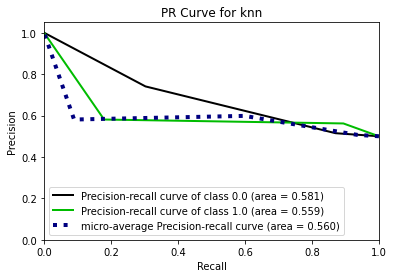

In [132]:
skplt.metrics.plot_precision_recall(y_test, y_knn_proba, title = 'PR Curve for knn')

In [133]:
y_clf_proba = clf.predict_proba(X_test)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:title={'center':'PR Curve for rf'}, xlabel='Recall', ylabel='Precision'>

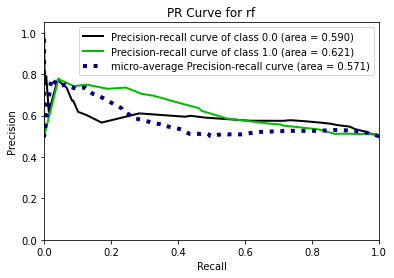

In [135]:
skplt.metrics.plot_precision_recall(y_test, y_clf_proba, title = 'PR Curve for rf')

In [138]:
y_log_proba = logreg.predict_proba(X_test_scaled)

<AxesSubplot:title={'center':'PR Curve for knn'}, xlabel='Recall', ylabel='Precision'>

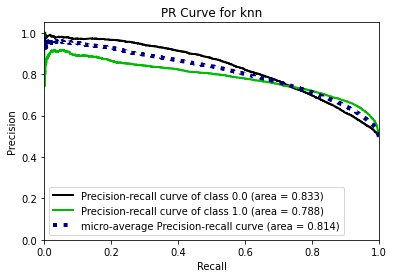

In [139]:
skplt.metrics.plot_precision_recall(y_test, y_log_proba, title = 'PR Curve for knn')

In [143]:
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


In [175]:
data.iloc[0]['BMI']

26.0

In [176]:
for i in range(len(data)):
  if data.iloc[i]['BMI']>=85:
    print(data.iloc[i])

Age                      2.0
Sex                      0.0
HighChol                 0.0
CholCheck                1.0
BMI                     92.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                30.0
PhysHlth                 0.0
DiffWalk                 0.0
Diabetes                 0.0
Hypertension             0.0
Stroke                   0.0
Name: 553, dtype: float64
Age                     10.0
Sex                      0.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                20.0
DiffWalk                 0.0
Diabetes         